In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,9
rcParams['figure.dpi'] = 300
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


def get_timings(filename):

    file = open("../results/" + filename + "/" + filename + "_sequential.txt", 'r')

    lines = file.readlines()

    splits = lines[0].split()

    t_seq_read = int(splits[3])

    total_time = 0
    iters = 0

    for i in range(1, len(lines)):

        total_time += int(lines[i].split()[4])
        iters += 1

    # print(f"Mean sequential time: {total_time/iters}")
    t_seq = total_time / iters

    file.close()

    file = open("../results/" + filename + "/" + filename + "_thread.txt", 'r')

    lines = file.readlines()

    splits = lines[0].split()

    t_thread_read = int(splits[4])

    workers_thread = []
    total_times_thread = []
    iters_thread = []

    last_worker = 1

    total_time = 0
    iter = 0

    for i in range(1, len(lines)):

        if last_worker != int(lines[i].split()[1][:-1]):

            # print(f"Mean sequential time for {last_worker} workers: {total_time/iter}") 
            workers_thread.append(last_worker)
            total_times_thread.append(total_time/iter)
            iters_thread.append(iter)

            last_worker = int(lines[i].split()[1][:-1])
            total_time = int(lines[i].split()[5])
            iter = 1
            
        else:

            total_time += int(lines[i].split()[5])
            iter += 1

    file.close()

    file = open("../results/" + filename + "/" + filename + "_ff.txt", 'r')

    lines = file.readlines()

    splits = lines[0].split()

    t_ff_read = int(splits[3])

    workers_ff = []
    total_times_ff = []
    iters_ff = []

    last_worker = 1

    total_time = 0
    iter = 0

    for i in range(1, len(lines)):

        if last_worker != int(lines[i].split()[1][:-1]):

            # print(f"Mean sequential time for {last_worker} workers: {total_time/iter}") 
            workers_ff.append(last_worker)
            total_times_ff.append(total_time/iter)
            iters_ff.append(iter)

            last_worker = int(lines[i].split()[1][:-1])
            total_time = int(lines[i].split()[5])
            iter = 1
            
        else:

            total_time += int(lines[i].split()[5])
            iter += 1

    return (t_seq_read, t_seq, workers_thread, workers_ff, total_times_thread, total_times_ff)




In [2]:
filename = input("Graph size: ")

(t_seq_read, t_seq, workers_thread, workers_ff, total_times_thread, total_times_ff) = get_timings(filename)

t_seq

13224496.6

In [3]:
for i in range(0, len(total_times_ff)):
    print(f"Workers: {i+1} time {total_times_ff[i]}")

Workers: 1 time 15355088.666666666
Workers: 2 time 11150112.333333334
Workers: 3 time 7968306.0
Workers: 4 time 5934893.666666667
Workers: 5 time 4891569.0
Workers: 6 time 4023436.0
Workers: 7 time 3668901.6666666665
Workers: 8 time 3355254.3333333335
Workers: 9 time 2749925.3333333335
Workers: 10 time 2468003.0
Workers: 11 time 2377852.6666666665
Workers: 12 time 2196875.0
Workers: 13 time 2001796.3333333333
Workers: 14 time 1860115.0
Workers: 15 time 1848147.3333333333
Workers: 16 time 1952591.3333333333
Workers: 17 time 1610477.3333333333
Workers: 18 time 1513935.0
Workers: 19 time 1921474.0
Workers: 20 time 1810875.6666666667
Workers: 21 time 1720023.3333333333
Workers: 22 time 1322185.6666666667
Workers: 23 time 1427548.3333333333
Workers: 24 time 1310773.0
Workers: 25 time 1265669.3333333333
Workers: 26 time 1495256.3333333333
Workers: 27 time 1202779.0
Workers: 28 time 1234661.3333333333
Workers: 29 time 1221795.0
Workers: 30 time 1202590.6666666667
Workers: 31 time 1136667.6666

In [10]:
for i in range(0, len(total_times_thread)):
    print(f"Workers: {i+1} time {total_times_thread[i]}")

Workers: 1 time 14744939.333333334
Workers: 2 time 10742981.666666666
Workers: 3 time 7724736.0
Workers: 4 time 6366435.333333333
Workers: 5 time 5409029.666666667
Workers: 6 time 4363335.333333333
Workers: 7 time 3890635.6666666665
Workers: 8 time 3346484.6666666665
Workers: 9 time 3003802.0
Workers: 10 time 2770675.3333333335
Workers: 11 time 2605212.0
Workers: 12 time 2359071.3333333335
Workers: 13 time 2184261.3333333335
Workers: 14 time 2091548.6666666667
Workers: 15 time 2046069.3333333333
Workers: 16 time 1959520.6666666667
Workers: 17 time 1783070.6666666667
Workers: 18 time 1710265.6666666667
Workers: 19 time 1733868.0
Workers: 20 time 1797293.3333333333
Workers: 21 time 1651644.0
Workers: 22 time 1541834.6666666667
Workers: 23 time 2022035.3333333333
Workers: 24 time 1943847.3333333333
Workers: 25 time 1514397.3333333333
Workers: 26 time 1552006.0
Workers: 27 time 1410975.6666666667
Workers: 28 time 1585880.0
Workers: 29 time 1463644.6666666667
Workers: 30 time 1438672.0
Work

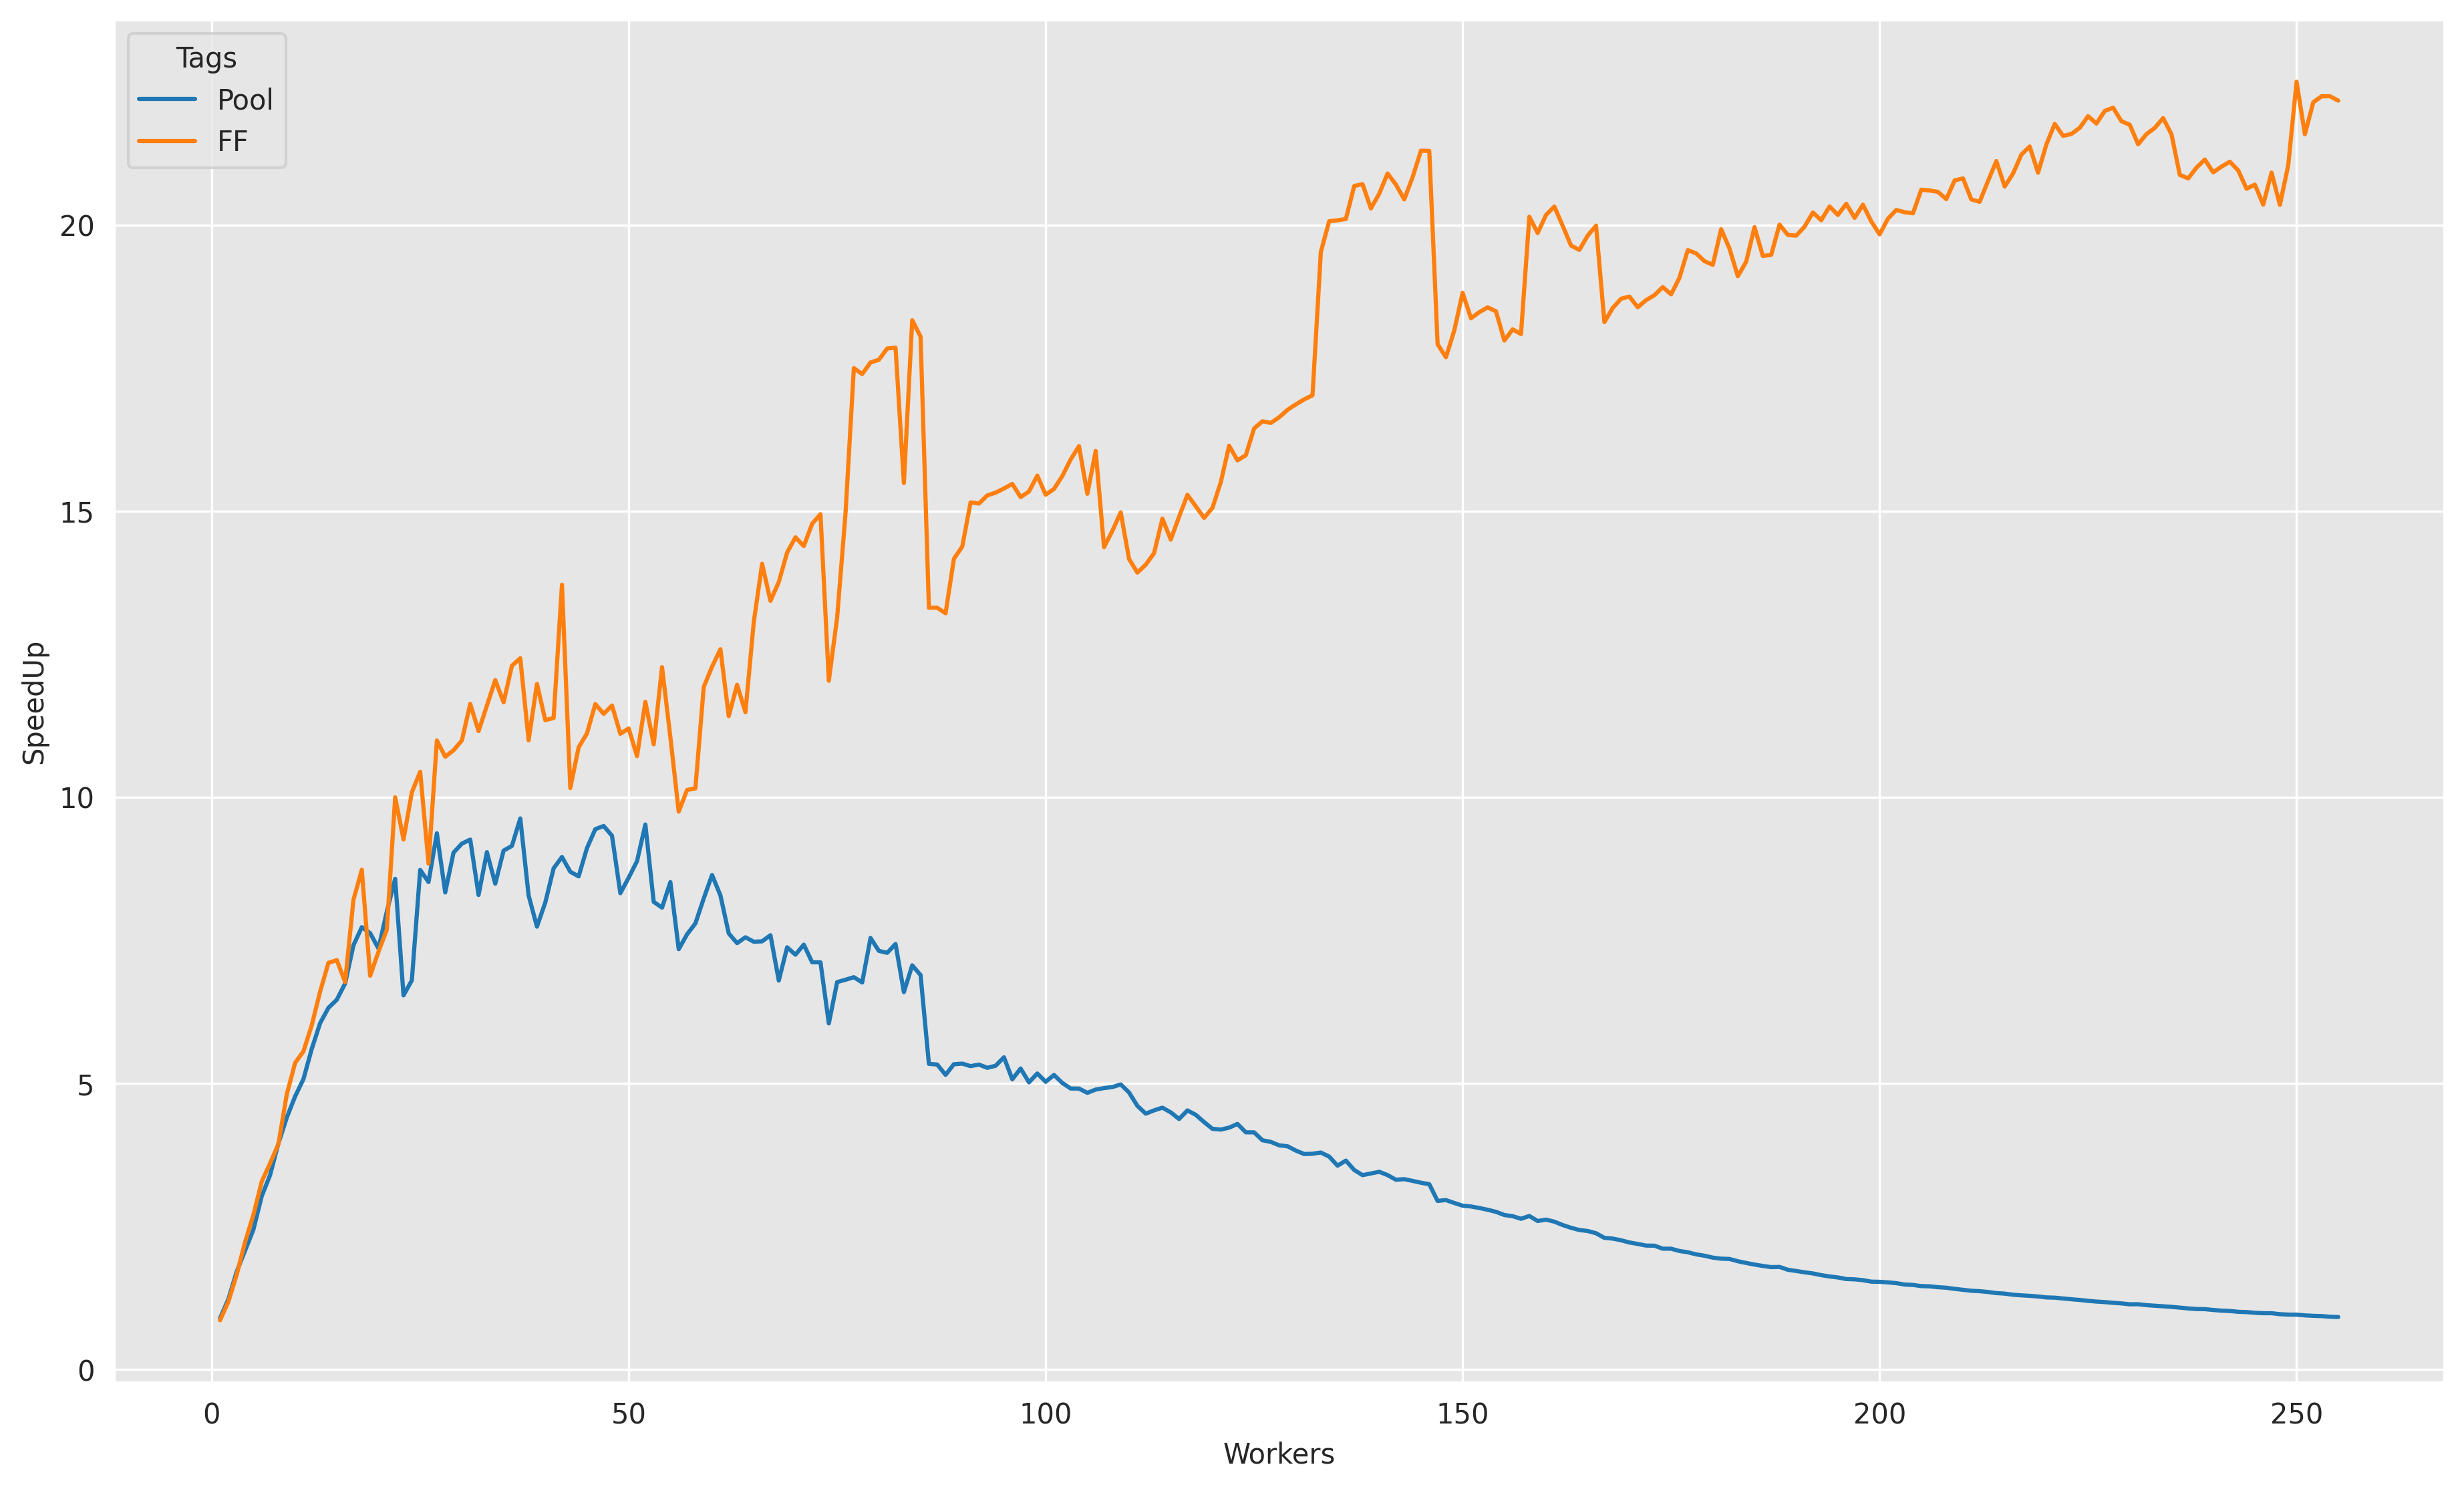

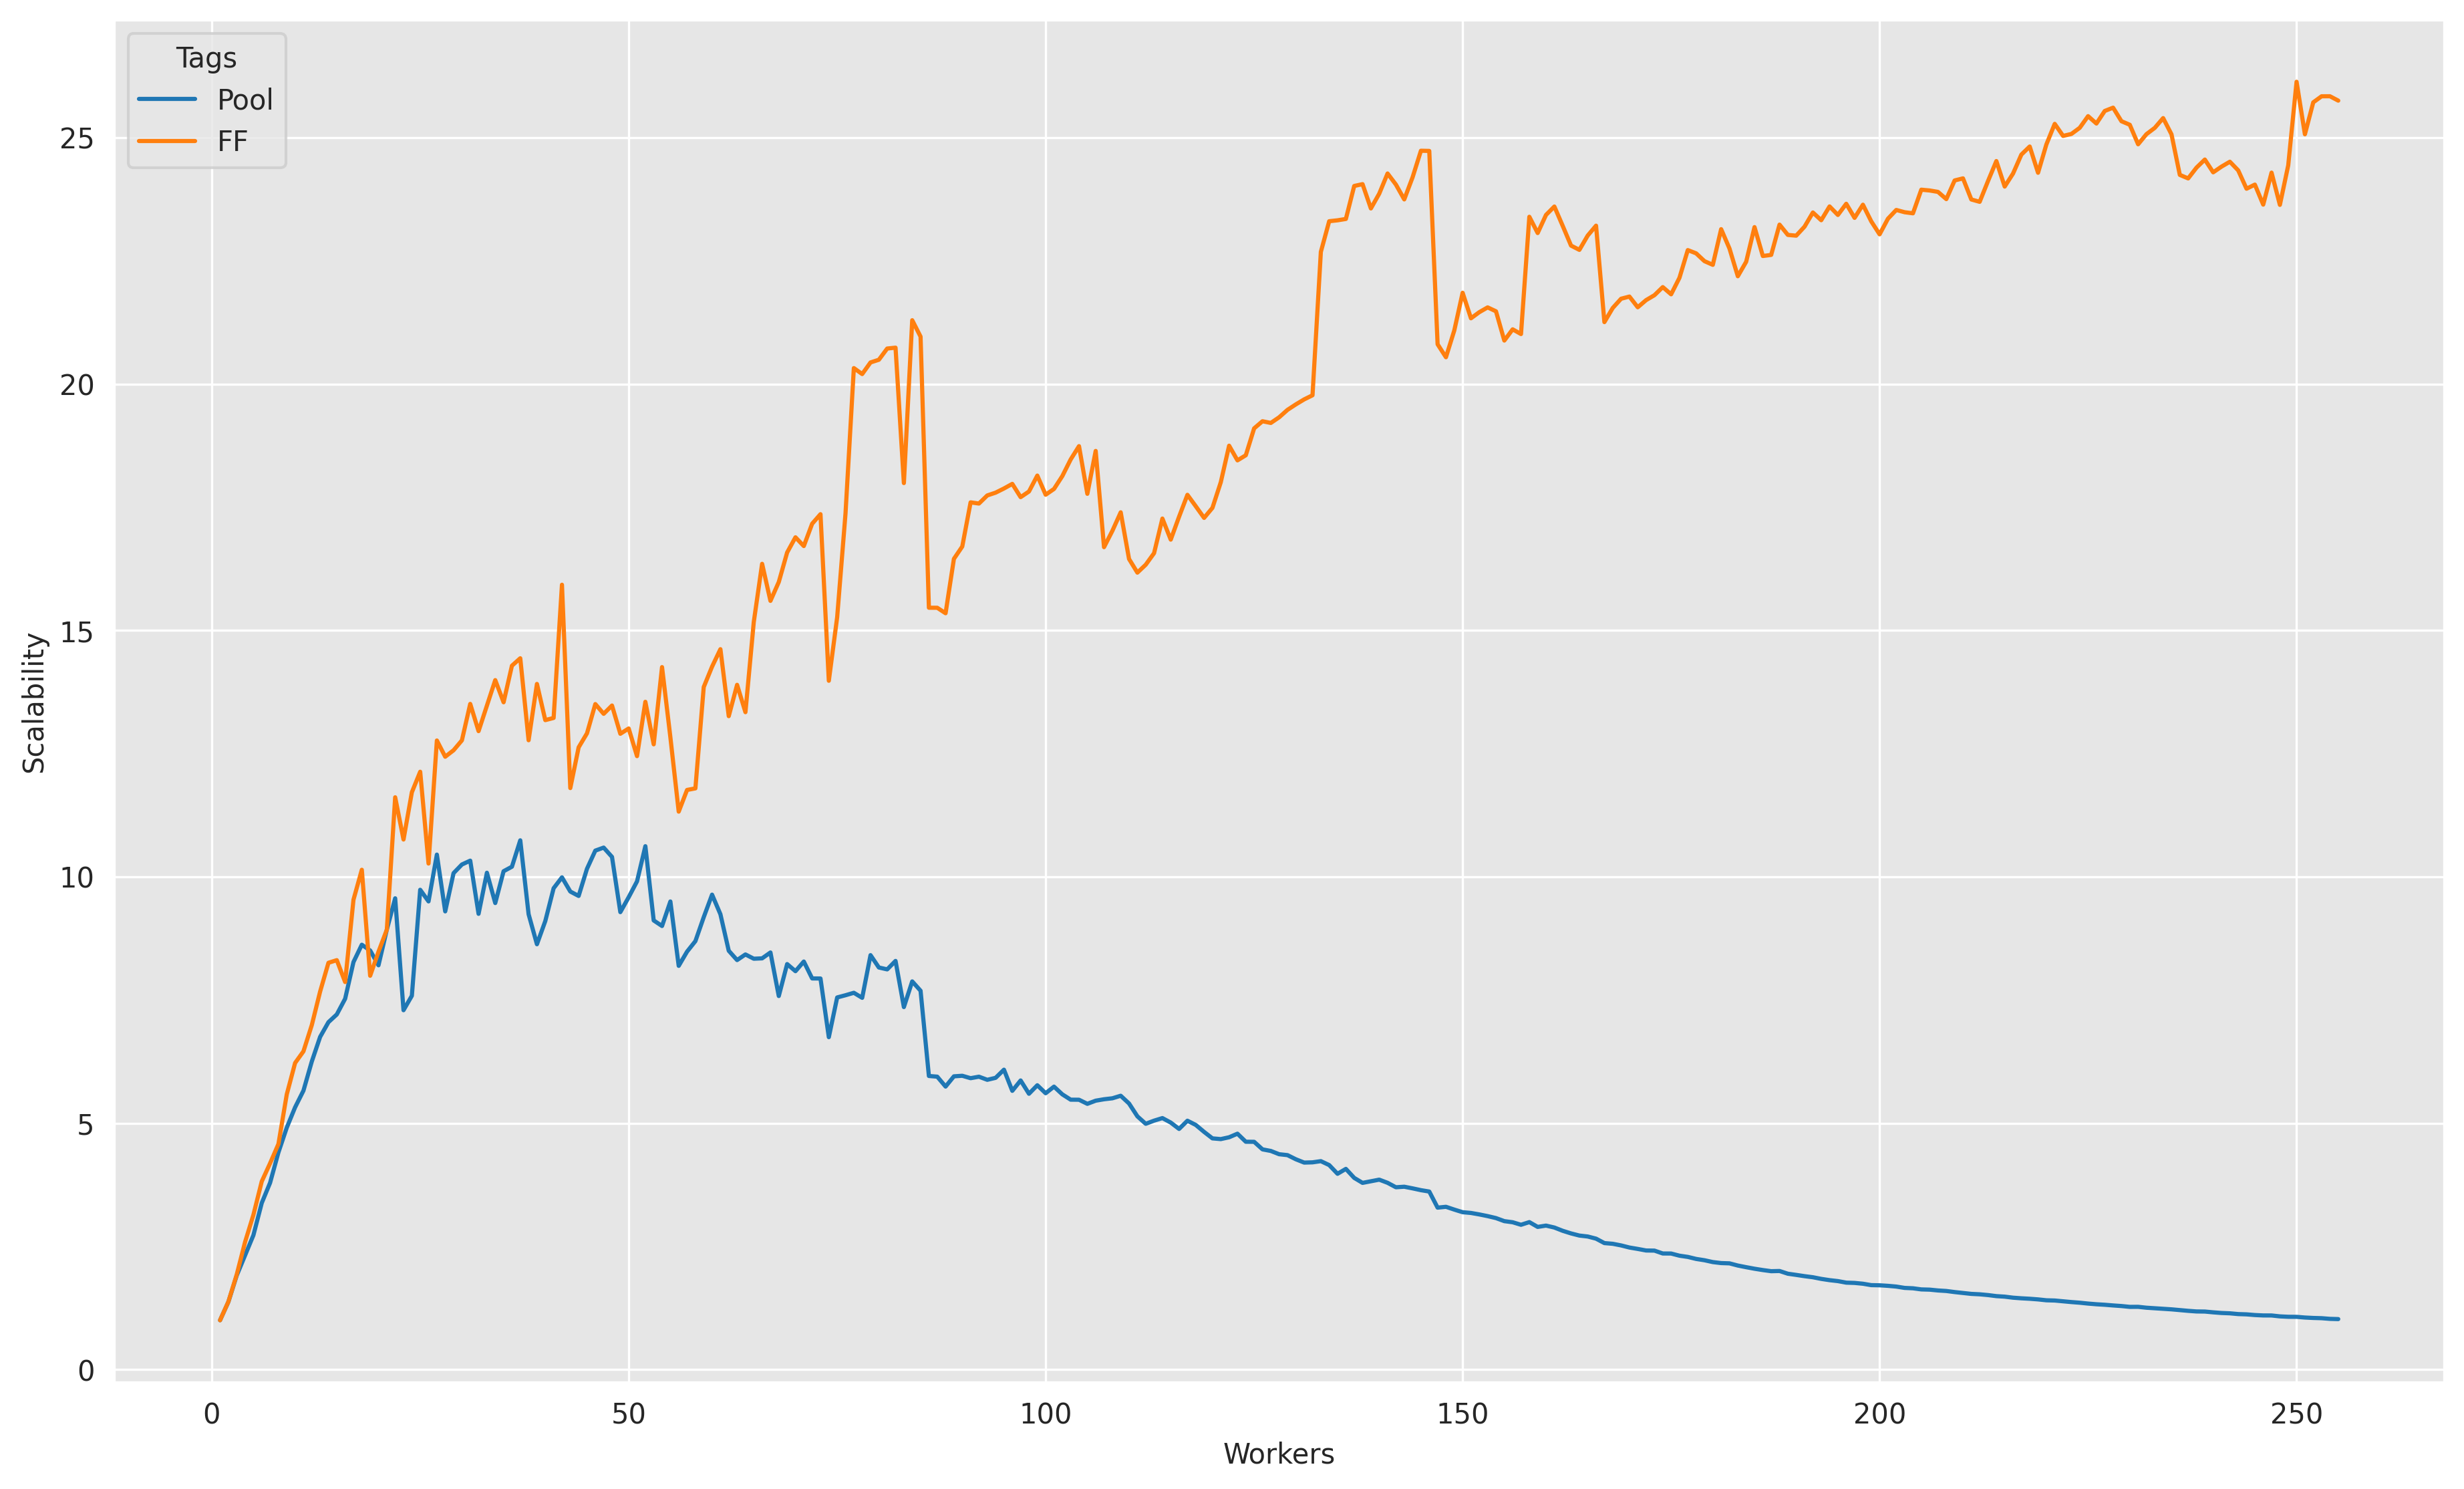

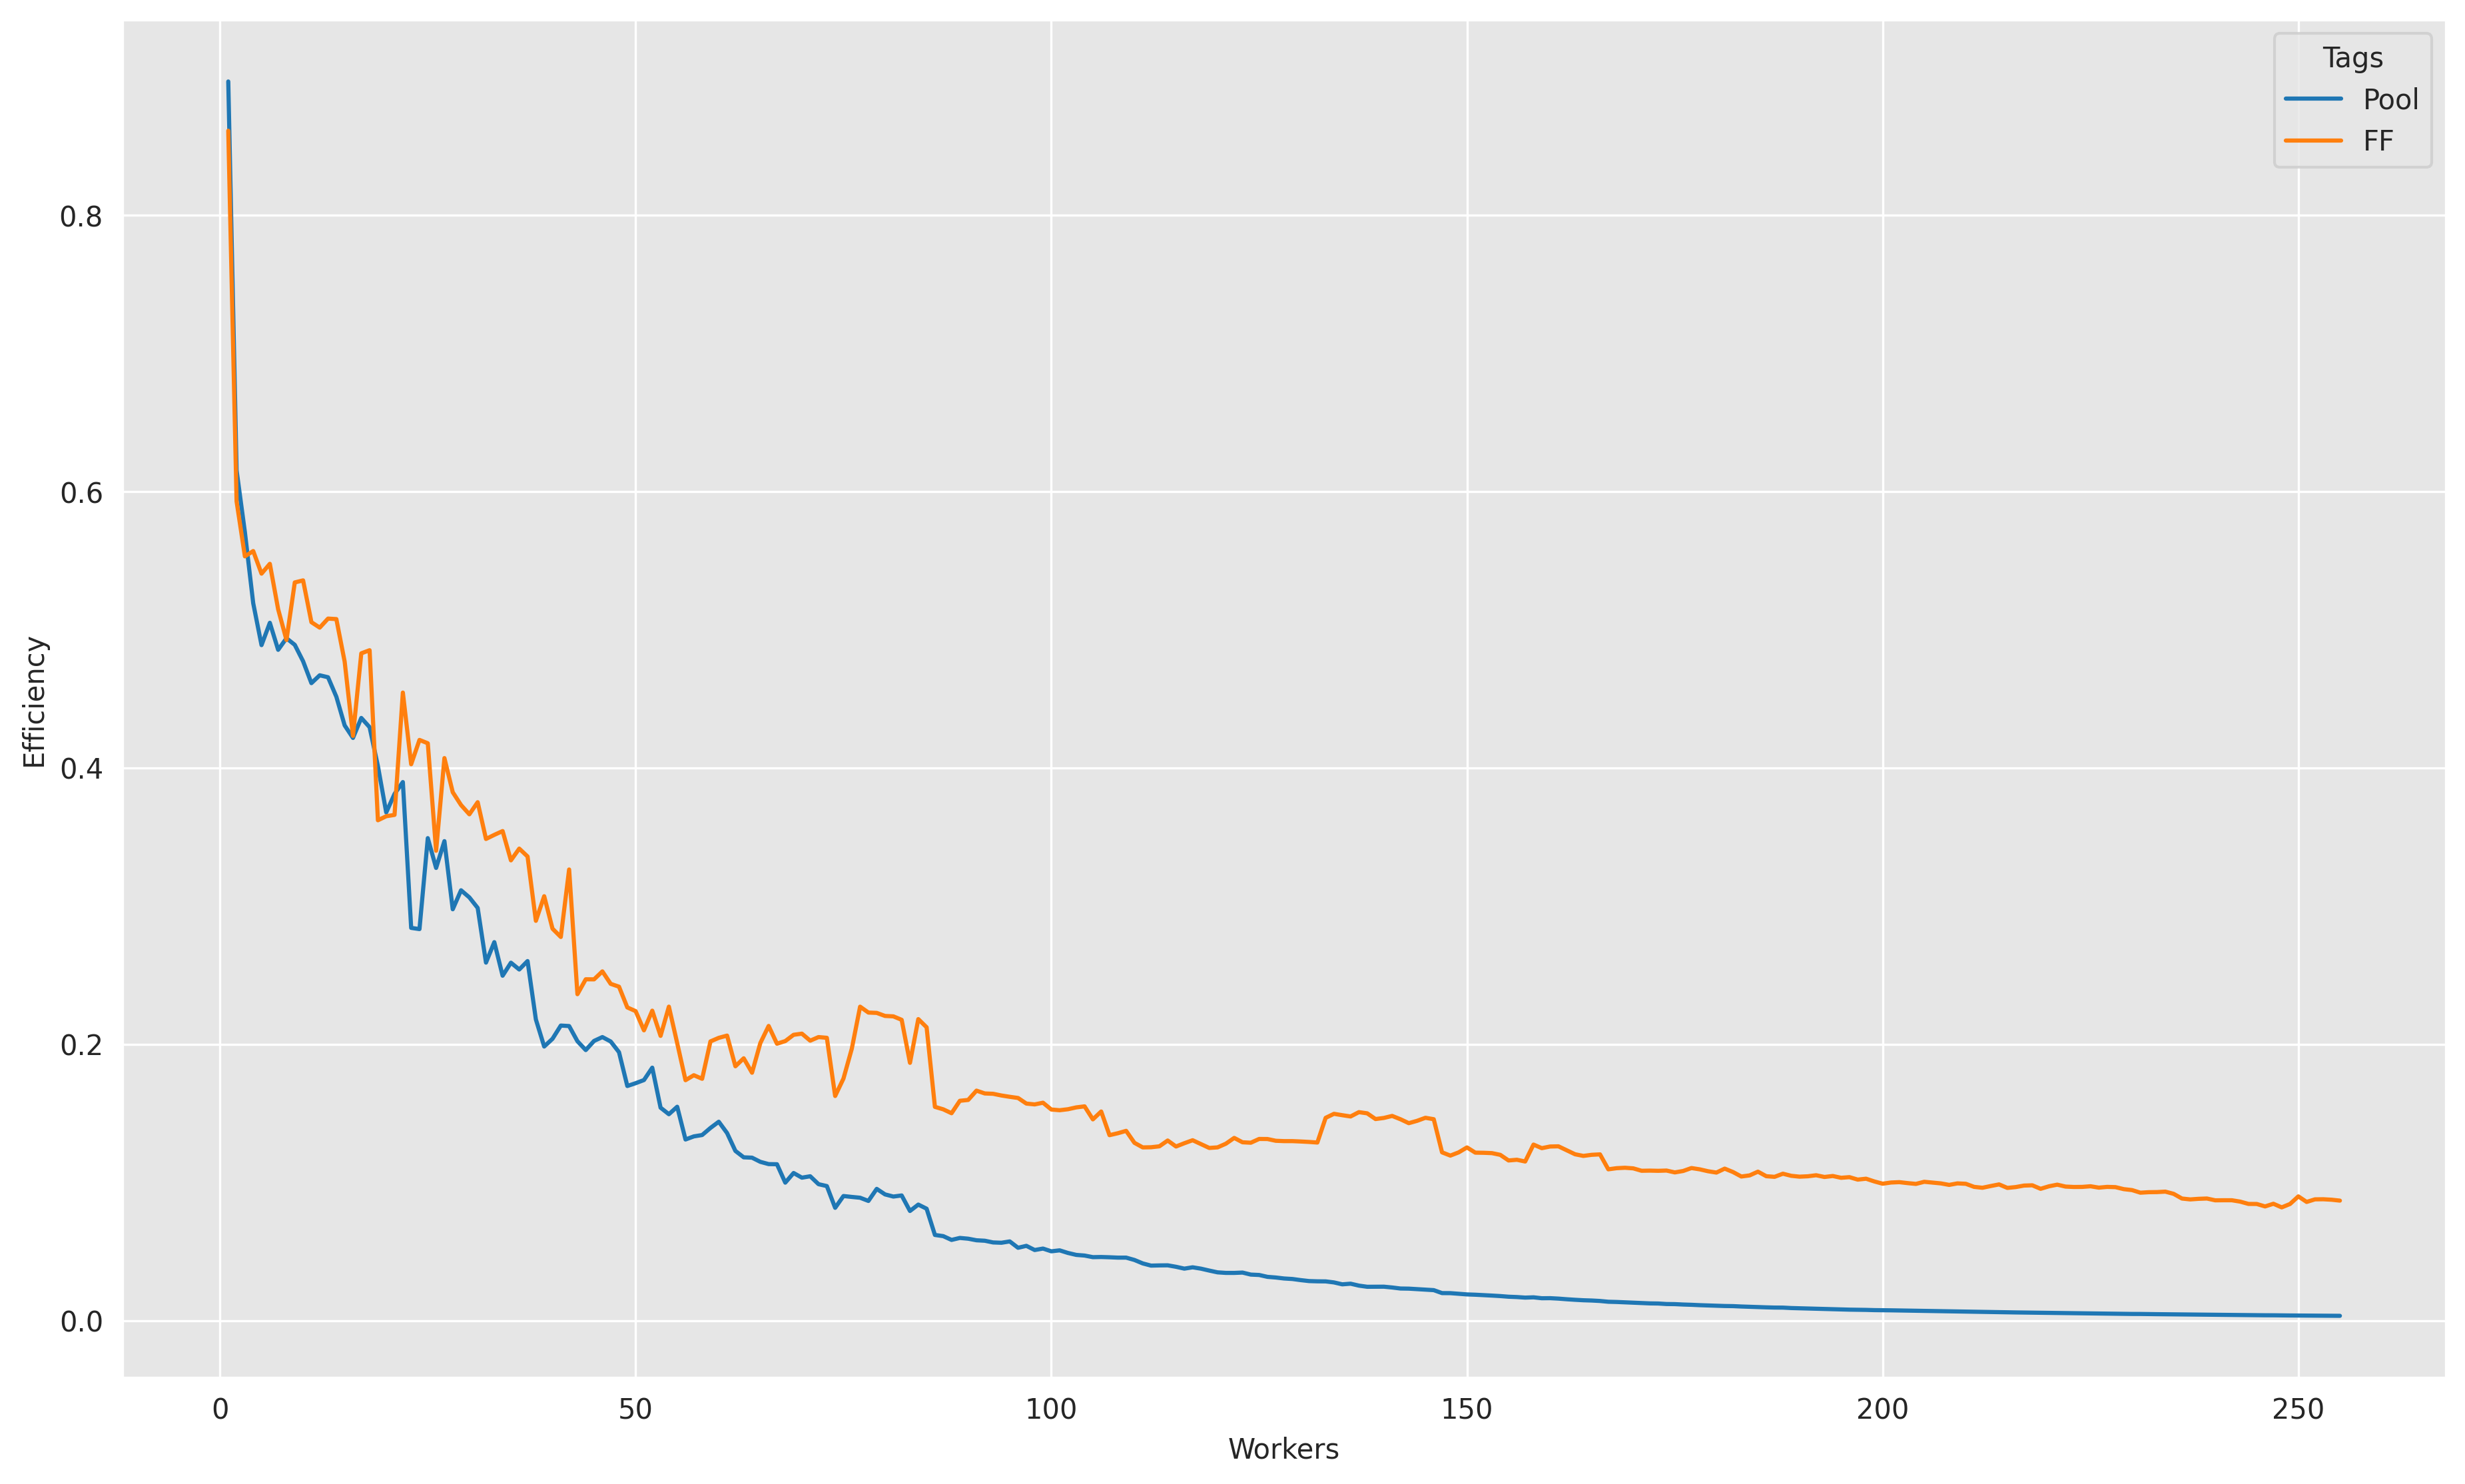

In [11]:
filename = input("Graph size: ")

(t_seq_read, t_seq, workers_thread, workers_ff, total_times_thread, total_times_ff) = get_timings(filename)

speedup_thread = []
speedup_ff = []

for val in total_times_thread:
    speedup_thread.append(float(t_seq / val))
    
for val in total_times_ff:
    speedup_ff.append(float(t_seq / val))

tag_thread = ["Pool"] * len(speedup_thread)
tag_ff = ["FF"] * len(speedup_ff)

scalability_thread = []
scalability_ff = []

for val in total_times_thread:
    scalability_thread.append(float(total_times_thread[0] / val))
    
for val in total_times_ff:
    scalability_ff.append(float(total_times_ff[0] / val))

efficiency_thread = []
efficiency_ff = []

for speedup, num_w in zip(speedup_thread, workers_thread):
    efficiency_thread.append(float(speedup / num_w))
    
for speedup, num_w in zip(speedup_ff, workers_ff):
    efficiency_ff.append(float(speedup / num_w))


total_speedup = speedup_thread + speedup_ff 
total_scalability = scalability_thread + scalability_ff 
total_efficiency = efficiency_thread + efficiency_ff  

total_workers = workers_thread + workers_ff

tags = tag_thread + tag_ff


df = pd.DataFrame(np.column_stack([total_speedup, total_workers, tags]), 
                               columns=['SpeedUp', 'Workers', 'Tags'])

df["SpeedUp"] = pd.to_numeric(df["SpeedUp"], downcast="float")
df["Workers"] = pd.to_numeric(df["Workers"], downcast="integer")


df2 = pd.DataFrame(np.column_stack([total_scalability, total_workers, tags]), 
                               columns=['Scalability', 'Workers', 'Tags'])

df2["Scalability"] = pd.to_numeric(df2["Scalability"], downcast="float")
df2["Workers"] = pd.to_numeric(df2["Workers"], downcast="integer")


df3 = pd.DataFrame(np.column_stack([total_efficiency, total_workers, tags]), 
                               columns=['Efficiency', 'Workers', 'Tags'])

df3["Efficiency"] = pd.to_numeric(df3["Efficiency"], downcast="float")
df3["Workers"] = pd.to_numeric(df3["Workers"], downcast="integer")



sns.lineplot(
    data=df, 
    x="Workers", y="SpeedUp", hue="Tags"
)

plt.show()

sns.lineplot(
    data=df2, 
    x="Workers", y="Scalability", hue="Tags"
)

plt.show()

sns.lineplot(
    data=df3, 
    x="Workers", y="Efficiency", hue="Tags"
)

plt.show()



In [11]:
display(df)

,SpeedUp,Workers,Tags
0,0.8419508210567731,1,Pool
1,1.3942092413482972,2,Pool
2,1.4681152206294963,3,Pool
3,1.2671462183013353,4,Pool
4,1.50501811198816,5,Pool
...,...,...,...
505,5.375530219979003,251,FF
506,5.405098617379941,252,FF
507,5.38346784723523,253,FF
508,5.252268667905436,254,FF
